# UMA Projekt
### Miłosz Cieśla, Filip Ryniewicz

### Potrzebne importy

In [18]:
import sys
sys.path.append('../')

from models.knn import KNN
from models.mlp import MLP
from models.random_forest import RandomForest
from utils import *
from eval_techniques import *
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import heapq


## Przygotowanie danych

In [2]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
X = np.array(X.values)
Y = np.array(breast_cancer_wisconsin_diagnostic.data.targets.Diagnosis)
Y = Y == "M"

## Dobór hiperparametrów

### Perceptron wielowarstwowy

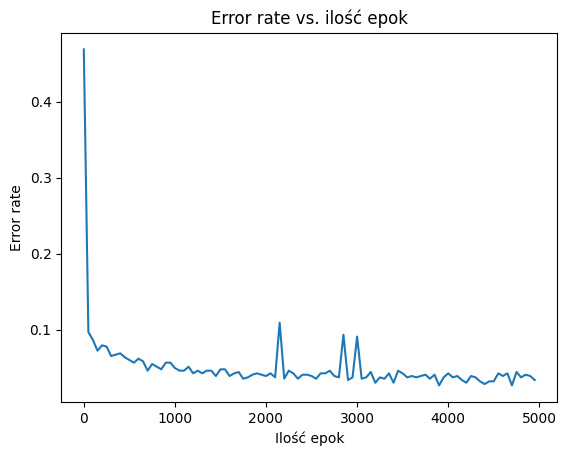

,Ilość epok,Error rate
0,3901,[0.026347117794486213]
1,4701,[0.026378446115288216]
2,4401,[0.028164160401002503]


In [23]:
epoch_lens = np.array(range(1, 5000)[::50])
error_rates = compare_hyperparams(MLP, epoch_lens, X, Y)

plt.plot(epoch_lens, error_rates)
plt.xlabel("Ilość epok")
plt.ylabel("Error rate")
plt.title("Error rate vs. ilość epok")
plt.show()

best_mlp_params = heapq.nsmallest(3, zip(epoch_lens, error_rates), key=lambda x: x[1])
df = pd.DataFrame(best_mlp_params, columns=["Ilość epok", "Error rate"])
df

## K najbliższych sąsiadów

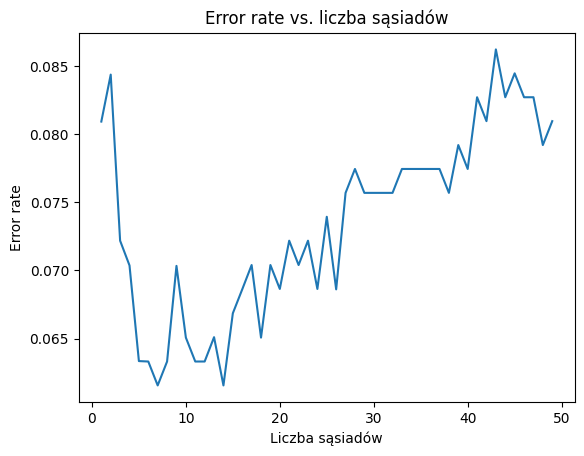

,Liczba sąsiadów,Error rate
0,7,[0.06156015037593985]
1,14,[0.06156015037593985]
2,6,[0.06331453634085213]


In [24]:
n_neighbors_list = list(range(1, 50))
error_rates = compare_hyperparams(KNN, n_neighbors_list, X, Y)

plt.plot(n_neighbors_list, error_rates)
plt.xlabel("Liczba sąsiadów")
plt.ylabel("Error rate")
plt.title("Error rate vs. liczba sąsiadów")
plt.show()

best_knn_params = heapq.nsmallest(3, zip(n_neighbors_list, error_rates), key=lambda x: x[1])
df = pd.DataFrame(best_knn_params, columns=["Liczba sąsiadów", "Error rate"])
df

## Las losowy

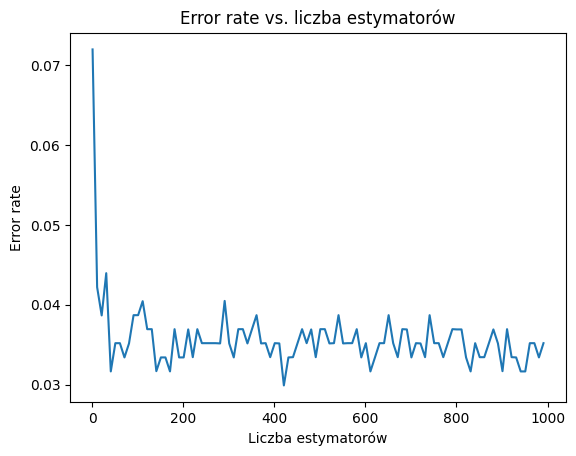

,Liczba estymatorów,Error rate
0,3901,[0.026347117794486213]
1,4701,[0.026378446115288216]
2,4401,[0.028164160401002503]


In [25]:
n_estimators_list = list(range(1, 1000)[::10])
error_rates = compare_hyperparams(RandomForest, n_estimators_list, X, Y)

plt.plot(n_estimators_list, error_rates)
plt.xlabel("Liczba estymatorów")
plt.ylabel("Error rate")
plt.title("Error rate vs. liczba estymatorów")
plt.show()

best_rf_params = heapq.nsmallest(3, zip(n_estimators_list, error_rates), key=lambda x: x[1])
df = pd.DataFrame(best_mlp_params, columns=["Liczba estymatorów", "Error rate"])
df

## Mierzenie czasu modeli

### Podział na Zbiór treningowy i testowy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### Perceptron wielowarstwowy

In [7]:
mlp_model = MLP()
mlp_start_time = perf_counter()
mlp_model.train(X_train_tensor, y_train_tensor)
mlp_train_time = perf_counter() - mlp_start_time

### K najbliższych sąsiadów

In [8]:
knn_model = KNN(n_neighbors=10)
knn_start_time = perf_counter()
knn_model.train(X_train, y_train)
knn_train_time = perf_counter() - knn_start_time


### Las losowy

In [9]:
rf_model = RandomForest(n_estimators=100)
rf_start_time = perf_counter()
rf_model.train(X_train, y_train)
rf_train_time = perf_counter() - rf_start_time


### Czasy trenowania

In [10]:
data = {"MLP": [mlp_train_time], "KNN": [knn_train_time], "Random Forest": [rf_train_time]}
df = pd.DataFrame(data, index=["Training Time"])
df

,MLP,KNN,Random Forest
Training Time,0.022732,0.000369,0.054101


## Predykcje modeli

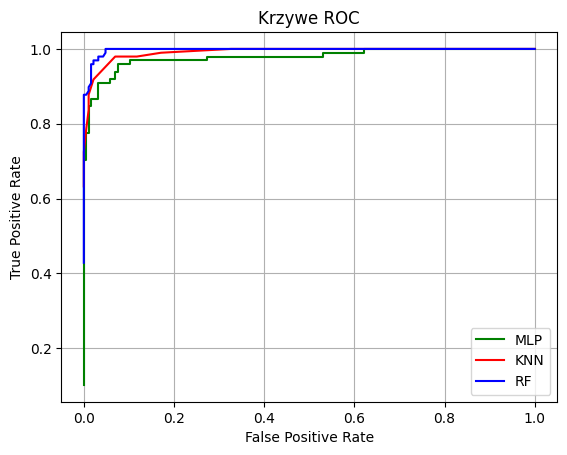

In [11]:
mlp_predictions = mlp_model.predict(X_test_tensor)
knn_predictions = knn_model.predict(X_test_tensor)
rf_predictions = rf_model.predict(X_test_tensor)
tpr, fpr = [0, 0, 0], [0, 0, 0]
tpr[0], fpr[0] = roc_curve(mlp_predictions, y_test)
tpr[1], fpr[1] = roc_curve(knn_predictions, y_test)
tpr[2], fpr[2] = roc_curve(rf_predictions, y_test)
plot_roc_curve(tpr, fpr)

In [12]:
predicted = model.predict(X_test)
correct = 0
for y_pred, y_real in zip(predicted, y_test):
    if y_pred == y_real:
        correct += 1
    print(f"KNN Predicted: {y_pred}, Real: {y_real}")

NameError: name 'model' is not defined